#### Aprender PANDAS Con fechas y realizar operaciones con fechas

In [1]:
#Importar las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Crear listas de datos posibles
nombres = ['Salome','Maria','Juan','Pedro','Luis','Ana','Juan','Carlos','Yamileth','Diana']
apellidos = ['Lopez','Gomez','Perez','Diaz','Martinez','Hernandez','Ramirez','Torres','Sanchez','Morales']
estados = ['Activo','Inactivo']
generos = ['F','F','M','M','M','F','M','M','F','F']
profesiones = ['Ingeniera','Abogada','Doctor','Ingeniero','Contador','Diseñadora','Profesor','Arquitecto','Medica','Economista']
puestos = ['Analista','Gerente','Director','Supervisor','Contador','Asistente','Profesor','Jefe','Médico','Consultor']

# Generar DataFrame con algunas columnas aleatorias
df = pd.DataFrame({
    'Id': range(1,11),
    'Nombre': nombres,
    'Apellido': [random.choice(apellidos) for _ in range(10)],
    'Estado': [random.choice(estados) for _ in range(10)],
    'Estatura': np.round(np.random.uniform(1.55, 1.85, size=10), 2),
    'Fecha_nacimiento': pd.to_datetime(np.random.randint(1990, 2005, size=10), format='%Y') + 
                         pd.to_timedelta(np.random.randint(1, 365, size=10), unit='D'),
    'Genero': generos,
    'Peso': np.random.randint(50, 85, size=10),
    'Profesion': [random.choice(profesiones) for _ in range(10)],
    'Salario': np.random.randint(2000, 5000, size=10),
    'Puesto': [random.choice(puestos) for _ in range(10)],
    'Trabaja': [random.choice([True, False]) for _ in range(10)],
    'Correo': [f"user{i}@mail.com" for i in range(1,11)],
    'Telefono': [f"{random.randint(1000000000,9999999999)}" for _ in range(10)]
})
# Mostrar el DataFrame
df.head(4)


,Id,Nombre,Apellido,Estado,Estatura,Fecha_nacimiento,Genero,Peso,Profesion,Salario,Puesto,Trabaja,Correo,Telefono
0,1,Salome,Sanchez,Activo,1.72,1995-01-14,F,58,Profesor,3411,Director,False,user1@mail.com,9071995723
1,2,Maria,Martinez,Inactivo,1.76,2002-10-25,F,76,Abogada,2880,Médico,False,user2@mail.com,3656063533
2,3,Juan,Diaz,Inactivo,1.57,2004-11-02,M,53,Arquitecto,4812,Médico,False,user3@mail.com,4938941323
3,4,Pedro,Diaz,Activo,1.61,1999-09-04,M,51,Abogada,3365,Contador,True,user4@mail.com,4540023175


In [2]:
#Verificar los tipos de datos
#df.dtypes
df['Fecha_nacimiento'] = pd.to_datetime(df['Fecha_nacimiento'])
df['Fecha_nacimiento'].dtype

dtype('<M8[ns]')

In [3]:
#Filtrar informacion de personas nacidas entre 1995 y 2000
df_filtrado = df[(df['Fecha_nacimiento'] >= "1995-01-01") & (df['Fecha_nacimiento'] <= "2000-12-31")]
df_filtrado

,Id,Nombre,Apellido,Estado,Estatura,Fecha_nacimiento,Genero,Peso,Profesion,Salario,Puesto,Trabaja,Correo,Telefono
8,9,Yamileth,Morales,Inactivo,1.65,1998-03-02,F,54,Ingeniera,2861,Jefe,False,user9@mail.com,2533114859


In [4]:
#Personas nacidas en 1999
nacida_1999 = df[df['Fecha_nacimiento'].dt.year == 1999]
nacida_1999

,Id,Nombre,Apellido,Estado,Estatura,Fecha_nacimiento,Genero,Peso,Profesion,Salario,Puesto,Trabaja,Correo,Telefono


In [5]:
#Personas nacidas en el mes 5
df[df['Fecha_nacimiento'].dt.month == 5]

,Id,Nombre,Apellido,Estado,Estatura,Fecha_nacimiento,Genero,Peso,Profesion,Salario,Puesto,Trabaja,Correo,Telefono


In [6]:
#Personas nacidas el dia 11
df[df['Fecha_nacimiento'].dt.day == 16]

,Id,Nombre,Apellido,Estado,Estatura,Fecha_nacimiento,Genero,Peso,Profesion,Salario,Puesto,Trabaja,Correo,Telefono


In [7]:
#Calcular la edad apartir de una fecha
hoy = pd.Timestamp.today()
df['Edad'] = (hoy - df['Fecha_nacimiento']).dt.days // 365
df

,Id,Nombre,Apellido,Estado,Estatura,Fecha_nacimiento,Genero,Peso,Profesion,Salario,Puesto,Trabaja,Correo,Telefono,Edad
0,1,Salome,Morales,Inactivo,1.84,2003-01-10,F,80,Medica,2611,Analista,True,user1@mail.com,6439733120,22
1,2,Maria,Perez,Activo,1.77,1992-02-02,F,64,Medica,3092,Asistente,False,user2@mail.com,1596955010,33
2,3,Juan,Ramirez,Activo,1.74,1992-04-10,M,65,Doctor,2167,Gerente,False,user3@mail.com,9736757871,33
3,4,Pedro,Lopez,Inactivo,1.79,1992-01-02,M,50,Doctor,2073,Contador,True,user4@mail.com,7653925769,33
4,5,Luis,Torres,Inactivo,1.72,1994-06-12,M,54,Arquitecto,3488,Médico,False,user5@mail.com,3014749994,31
5,6,Ana,Gomez,Inactivo,1.79,1992-01-12,F,63,Medica,4968,Asistente,False,user6@mail.com,2053198202,33
6,7,Juan,Gomez,Activo,1.75,2003-04-26,M,63,Profesor,4664,Consultor,True,user7@mail.com,1983582048,22
7,8,Carlos,Gomez,Activo,1.77,1991-11-18,M,78,Ingeniera,3771,Analista,False,user8@mail.com,3010300068,33
8,9,Yamileth,Morales,Inactivo,1.65,1998-03-02,F,54,Ingeniera,2861,Jefe,False,user9@mail.com,2533114859,27
9,10,Diana,Sanchez,Inactivo,1.62,1994-12-10,F,64,Doctor,3512,Médico,False,user10@mail.com,5744606988,30


In [8]:
df.head()

,Id,Nombre,Apellido,Estado,Estatura,Fecha_nacimiento,Genero,Peso,Profesion,Salario,Puesto,Trabaja,Correo,Telefono,Edad
0,1,Salome,Morales,Inactivo,1.84,2003-01-10,F,80,Medica,2611,Analista,True,user1@mail.com,6439733120,22
1,2,Maria,Perez,Activo,1.77,1992-02-02,F,64,Medica,3092,Asistente,False,user2@mail.com,1596955010,33
2,3,Juan,Ramirez,Activo,1.74,1992-04-10,M,65,Doctor,2167,Gerente,False,user3@mail.com,9736757871,33
3,4,Pedro,Lopez,Inactivo,1.79,1992-01-02,M,50,Doctor,2073,Contador,True,user4@mail.com,7653925769,33
4,5,Luis,Torres,Inactivo,1.72,1994-06-12,M,54,Arquitecto,3488,Médico,False,user5@mail.com,3014749994,31


In [9]:
#import locale
#locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')

df['Año'] = df['Fecha_nacimiento'].dt.year
df['Mes'] = df['Fecha_nacimiento'].dt.month
df['Día'] = df['Fecha_nacimiento'].dt.day
df['Nombre_dia']= df['Fecha_nacimiento'].dt.day_name(locale='es_ES.UTF-8')

df


,Id,Nombre,Apellido,Estado,Estatura,Fecha_nacimiento,Genero,Peso,Profesion,Salario,Puesto,Trabaja,Correo,Telefono,Edad,Año,Mes,Día,Nombre_dia
0,1,Salome,Morales,Inactivo,1.84,2003-01-10,F,80,Medica,2611,Analista,True,user1@mail.com,6439733120,22,2003,1,10,Viernes
1,2,Maria,Perez,Activo,1.77,1992-02-02,F,64,Medica,3092,Asistente,False,user2@mail.com,1596955010,33,1992,2,2,Domingo
2,3,Juan,Ramirez,Activo,1.74,1992-04-10,M,65,Doctor,2167,Gerente,False,user3@mail.com,9736757871,33,1992,4,10,Viernes
3,4,Pedro,Lopez,Inactivo,1.79,1992-01-02,M,50,Doctor,2073,Contador,True,user4@mail.com,7653925769,33,1992,1,2,Jueves
4,5,Luis,Torres,Inactivo,1.72,1994-06-12,M,54,Arquitecto,3488,Médico,False,user5@mail.com,3014749994,31,1994,6,12,Domingo
5,6,Ana,Gomez,Inactivo,1.79,1992-01-12,F,63,Medica,4968,Asistente,False,user6@mail.com,2053198202,33,1992,1,12,Domingo
6,7,Juan,Gomez,Activo,1.75,2003-04-26,M,63,Profesor,4664,Consultor,True,user7@mail.com,1983582048,22,2003,4,26,Sã¡bado
7,8,Carlos,Gomez,Activo,1.77,1991-11-18,M,78,Ingeniera,3771,Analista,False,user8@mail.com,3010300068,33,1991,11,18,Lunes
8,9,Yamileth,Morales,Inactivo,1.65,1998-03-02,F,54,Ingeniera,2861,Jefe,False,user9@mail.com,2533114859,27,1998,3,2,Lunes
9,10,Diana,Sanchez,Inactivo,1.62,1994-12-10,F,64,Doctor,3512,Médico,False,user10@mail.com,5744606988,30,1994,12,10,Sã¡bado


In [10]:
#Cantidad de personas nacidas por años
grupo1= df.groupby(df['Fecha_nacimiento'].dt.year)['Id'].count().reset_index()
grupo1

,Fecha_nacimiento,Id
0,1991,1
1,1992,4
2,1994,2
3,1998,1
4,2003,2


In [11]:
#Ordenar informacion por fechas
df.set_index('Nombre')
df.sort_index(ascending=True, inplace=True)
df

,Id,Nombre,Apellido,Estado,Estatura,Fecha_nacimiento,Genero,Peso,Profesion,Salario,Puesto,Trabaja,Correo,Telefono,Edad,Año,Mes,Día,Nombre_dia
0,1,Salome,Morales,Inactivo,1.84,2003-01-10,F,80,Medica,2611,Analista,True,user1@mail.com,6439733120,22,2003,1,10,Viernes
1,2,Maria,Perez,Activo,1.77,1992-02-02,F,64,Medica,3092,Asistente,False,user2@mail.com,1596955010,33,1992,2,2,Domingo
2,3,Juan,Ramirez,Activo,1.74,1992-04-10,M,65,Doctor,2167,Gerente,False,user3@mail.com,9736757871,33,1992,4,10,Viernes
3,4,Pedro,Lopez,Inactivo,1.79,1992-01-02,M,50,Doctor,2073,Contador,True,user4@mail.com,7653925769,33,1992,1,2,Jueves
4,5,Luis,Torres,Inactivo,1.72,1994-06-12,M,54,Arquitecto,3488,Médico,False,user5@mail.com,3014749994,31,1994,6,12,Domingo
5,6,Ana,Gomez,Inactivo,1.79,1992-01-12,F,63,Medica,4968,Asistente,False,user6@mail.com,2053198202,33,1992,1,12,Domingo
6,7,Juan,Gomez,Activo,1.75,2003-04-26,M,63,Profesor,4664,Consultor,True,user7@mail.com,1983582048,22,2003,4,26,Sã¡bado
7,8,Carlos,Gomez,Activo,1.77,1991-11-18,M,78,Ingeniera,3771,Analista,False,user8@mail.com,3010300068,33,1991,11,18,Lunes
8,9,Yamileth,Morales,Inactivo,1.65,1998-03-02,F,54,Ingeniera,2861,Jefe,False,user9@mail.com,2533114859,27,1998,3,2,Lunes
9,10,Diana,Sanchez,Inactivo,1.62,1994-12-10,F,64,Doctor,3512,Médico,False,user10@mail.com,5744606988,30,1994,12,10,Sã¡bado


In [12]:
#Personas nacidas antes del 200
df[df['Año']< 2000 ]

,Id,Nombre,Apellido,Estado,Estatura,Fecha_nacimiento,Genero,Peso,Profesion,Salario,Puesto,Trabaja,Correo,Telefono,Edad,Año,Mes,Día,Nombre_dia
1,2,Maria,Perez,Activo,1.77,1992-02-02,F,64,Medica,3092,Asistente,False,user2@mail.com,1596955010,33,1992,2,2,Domingo
2,3,Juan,Ramirez,Activo,1.74,1992-04-10,M,65,Doctor,2167,Gerente,False,user3@mail.com,9736757871,33,1992,4,10,Viernes
3,4,Pedro,Lopez,Inactivo,1.79,1992-01-02,M,50,Doctor,2073,Contador,True,user4@mail.com,7653925769,33,1992,1,2,Jueves
4,5,Luis,Torres,Inactivo,1.72,1994-06-12,M,54,Arquitecto,3488,Médico,False,user5@mail.com,3014749994,31,1994,6,12,Domingo
5,6,Ana,Gomez,Inactivo,1.79,1992-01-12,F,63,Medica,4968,Asistente,False,user6@mail.com,2053198202,33,1992,1,12,Domingo
7,8,Carlos,Gomez,Activo,1.77,1991-11-18,M,78,Ingeniera,3771,Analista,False,user8@mail.com,3010300068,33,1991,11,18,Lunes
8,9,Yamileth,Morales,Inactivo,1.65,1998-03-02,F,54,Ingeniera,2861,Jefe,False,user9@mail.com,2533114859,27,1998,3,2,Lunes
9,10,Diana,Sanchez,Inactivo,1.62,1994-12-10,F,64,Doctor,3512,Médico,False,user10@mail.com,5744606988,30,1994,12,10,Sã¡bado


### Tablas Dinamicas.

In [13]:
#Promedio de salario por profesion
tabla1 = pd.pivot_table(df, index='Profesion', values='Salario', aggfunc='mean')
tabla1

,Salario
Profesion,
Arquitecto,3488.0
Doctor,2584.0
Ingeniera,3316.0
Medica,3557.0
Profesor,4664.0


In [14]:
#Promedio y suma del salario por puesto:
tabla2 = pd.pivot_table(df, values='Salario',index='Puesto',aggfunc='mean')
tabla2

,Salario
Puesto,
Analista,3191.0
Asistente,4030.0
Consultor,4664.0
Contador,2073.0
Gerente,2167.0
Jefe,2861.0
Médico,3500.0


In [15]:
#Agrupar por filas y columnas
#Promedio de salario por género y estado (Activo/Inactivo):
tabla_agrupada = pd.pivot_table(df, values='Salario', index='Genero',  columns='Estado', aggfunc='mean')
tabla_agrupada

Estado,Activo,Inactivo
Genero,,
F,3092.0,3488.0
M,3534.0,2780.5


In [16]:
#Usando varias columnas como índice Promedio de peso por profesión y género:
pivot4 = pd.pivot_table(df, 
                        values="Peso", 
                        index=["Profesion","Genero"], 
                        aggfunc="mean")
pivot4

Peso
Profesion  Genero      
Arquitecto M       54.0
Doctor     F       64.0
           M       57.5
Ingeniera  F       54.0
           M       78.0
Medica     F       69.0
Profesor   M       63.0

In [17]:
pivot5 = pd.pivot_table(df, 
                        values="Id", 
                        index="Profesion", 
                        columns="Estado", 
                        aggfunc="count", fill_value=0)
pivot5

Estado,Activo,Inactivo
Profesion,,
Arquitecto,0,1
Doctor,1,2
Ingeniera,1,1
Medica,1,2
Profesor,1,0


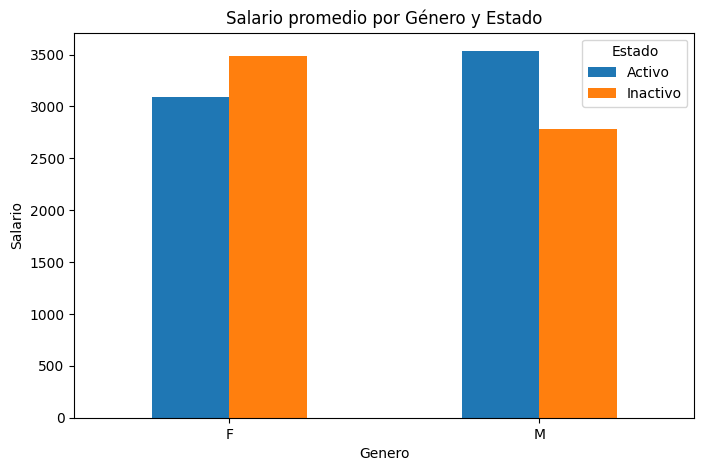

In [18]:
#Graficar
tabla_agrupada.plot(kind="bar", figsize=(8,5))
plt.title("Salario promedio por Género y Estado")
plt.ylabel("Salario")
plt.xticks(rotation='horizontal')
plt.show()


In [20]:
#Calculos de Operaciones usando funciones
def calcular_imc(fila):
    return fila["Peso"] / (fila["Estatura"] ** 2)

df["IMC"] = df.apply(calcular_imc, axis=1)
df


,Id,Nombre,Apellido,Estado,Estatura,Fecha_nacimiento,Genero,Peso,Profesion,Salario,Puesto,Trabaja,Correo,Telefono,Edad,Año,Mes,Día,Nombre_dia,IMC
0,1,Salome,Morales,Inactivo,1.84,2003-01-10,F,80,Medica,2611,Analista,True,user1@mail.com,6439733120,22,2003,1,10,Viernes,23.629490
1,2,Maria,Perez,Activo,1.77,1992-02-02,F,64,Medica,3092,Asistente,False,user2@mail.com,1596955010,33,1992,2,2,Domingo,20.428357
2,3,Juan,Ramirez,Activo,1.74,1992-04-10,M,65,Doctor,2167,Gerente,False,user3@mail.com,9736757871,33,1992,4,10,Viernes,21.469150
3,4,Pedro,Lopez,Inactivo,1.79,1992-01-02,M,50,Doctor,2073,Contador,True,user4@mail.com,7653925769,33,1992,1,2,Jueves,15.605006
4,5,Luis,Torres,Inactivo,1.72,1994-06-12,M,54,Arquitecto,3488,Médico,False,user5@mail.com,3014749994,31,1994,6,12,Domingo,18.253110
5,6,Ana,Gomez,Inactivo,1.79,1992-01-12,F,63,Medica,4968,Asistente,False,user6@mail.com,2053198202,33,1992,1,12,Domingo,19.662308
6,7,Juan,Gomez,Activo,1.75,2003-04-26,M,63,Profesor,4664,Consultor,True,user7@mail.com,1983582048,22,2003,4,26,Sã¡bado,20.571429
7,8,Carlos,Gomez,Activo,1.77,1991-11-18,M,78,Ingeniera,3771,Analista,False,user8@mail.com,3010300068,33,1991,11,18,Lunes,24.897060
8,9,Yamileth,Morales,Inactivo,1.65,1998-03-02,F,54,Ingeniera,2861,Jefe,False,user9@mail.com,2533114859,27,1998,3,2,Lunes,19.834711
9,10,Diana,Sanchez,Inactivo,1.62,1994-12-10,F,64,Doctor,3512,Médico,False,user10@mail.com,5744606988,30,1994,12,10,Sã¡bado,24.386526
